![SNOWFALL](header.png)

<center><H1><b>CROSMOD<br>CR</b>op <b>S</b>tress <b>MO</b>nitoring in the semi-arid context of <b>D</b>oukkala</H1></center>


<br>
The CROSMOD project aims at developing a procedure for crop yield estimates and extreme events crops shocks monitoring or pest and diseases by integrating multiple satellite data and water-energy-crop modelling, able to support farmers precision agriculture.<br> 
The use of hydrological models with remote sensing data helps to fill the gap when it comes to some missing or hard-to-get in-situ parameters, especially in regions with poor monitoring networks as it is the case for the Doukkala region in Morocco. In this project, a distributed hydrological energy water balance model (FEST-EWB-SAFY) was implemented and calibrated for different crops fields. Leaf-Area Index (LAI) data was used to calibrate the model in its crop development part, and Land surface temperature (LST) data from the LANDSAT 8 and 9 was used to calibrate the energy budget component. <br>Due to the missing information of irrigation, a standard FAO irrigation approach has been implemented.

<center><b>-------------------------------------------------------------------</b></center>
<H3><b>Workflow steps</b></H3>
<ol>
  <li> Retrieval of Sentinel 2 radiance information to obtain NDVI, albedo, vegetation fraction and leaf area index </li>
  <li> Execution of FEST-EWB-SAFY model </li>
    <li> Retrieval of Landsat 8/9 thermal information </li>
    <li> Display of model results against satellite data
</li>
</ol>
<br>
Chiara <b>Corbari</b>, Nicola <b>Paciolla</b> - Politecnico di Milano (Italy)<br>
Fatima-ezzahra <b>Elghandour</b>, Youssef <b>Houali</b> - Chouaib Doukkali University (Morocco)
<br>
<br>
<b>References</b>
<br>
[1] Corbari, C., Ravazzani, G. and Mancini, M. (2011), A distributed thermodynamic model for energy and mass balance computation: FEST–EWB. Hydrol. Process., 25: 1443-1452. https://doi.org/10.1002/hyp.7910<br>
[2] Corbari, C., Ben Charfi, I., Al Bitar, A., Skokovic, D., Sobrino, J.A., Perelli, C., Branca, G., Mancini, M. (2022), A fully coupled crop-water-energy balance model based on satellite data for maize and tomato crops yield estimates: The FEST-EWB-SAFY model, Agr. Wat. Man., 272: 107850. https://doi.org/10.1016/j.agwat.2022.107850
<br>
----------------------<br>
<i>Necessary packages:</i><br>
- Python: datetime, fiona, glob, matplotlib, numpy, odc, os, pandas, PIL, planetary_computer, pystac, pystac_client, rasterio, rpy2<br>
- R: data.table, dplyr, lubridate, purrr, raster, tiff

<center><b>--------------------------------------------------------------------</b>
<H2><b>Step 1: Retrieval of vegetation information from satellite</b></H2></center>

In [702]:
%run Satellite_data_retrieval.ipynb

Found: 42 items
+++ Date  2021-10-08  is complete +++
+++ Date  2021-10-13  is complete +++
+++ Date  2021-10-18  is complete +++
+++ Date  2021-10-23  is complete +++
+++ Date  2021-10-28  is complete +++
+++ Date  2021-11-02  is complete +++
+++ Date  2021-11-07  is complete +++
+++ Date  2021-11-12  is complete +++
+++ Date  2021-11-17  is complete +++
+++ Date  2021-11-22  is complete +++
too many nans in  2021-11-27
too many nans in  2021-12-02
+++ Date  2021-12-07  is complete +++
+++ Date  2021-12-12  is complete +++
+++ Date  2021-12-17  is complete +++
too many nans in  2021-12-22
too many nans in  2021-12-27
+++ Date  2022-01-01  is complete +++
+++ Date  2022-01-06  is complete +++
+++ Date  2022-01-11  is complete +++
+++ Date  2022-01-16  is complete +++
+++ Date  2022-01-21  is complete +++
+++ Date  2022-01-26  is complete +++
+++ Date  2022-01-31  is complete +++
too many nans in  2022-02-05
+++ Date  2022-02-10  is complete +++
+++ Date  2022-02-15  is complete +++
too

In [704]:
%reset -sf

<center><b>--------------------------------------------------------------------</b>
<H2><b>Step 2: Run of the FEST-EWB-SAFY model</b></H2></center>

In [696]:
from datetime import datetime
now = datetime.now()

import rpy2
import rpy2.robjects as robjects

# Defining the R script and loading the instance in Python
r = robjects.r
r['source']('fest_safy_2d.R')

final = datetime.now()
print("elapsed time:",final-now,"secs")

  |==================================================| 100%
elapsed time: 0:18:14.419462 secs


<center><b>--------------------------------------------------------------------</b>
<H2><b>Step 3: Retrieval of Landsat 8/9 thermal information</b></H2></center>

In [716]:
%run Satellite_LST_data_retrieval.ipynb

Returned 32 Items
+++ Date  2021-10-09  is complete +++
+++ Date  2021-10-18  is complete +++
+++ Date  2021-11-07  is complete +++
+++ Date  2021-11-12  is complete +++
+++ Date  2021-11-22  is complete +++
+++ Date  2021-12-04  is complete +++
+++ Date  2021-12-05  is complete +++
+++ Date  2021-12-12  is complete +++
+++ Date  2021-12-13  is complete +++
+++ Date  2021-12-29  is complete +++
+++ Date  2022-01-05  is complete +++
+++ Date  2022-01-06  is complete +++
+++ Date  2022-01-13  is complete +++
+++ Date  2022-01-14  is complete +++
+++ Date  2022-01-21  is complete +++
+++ Date  2022-01-30  is complete +++
+++ Date  2022-02-07  is complete +++
+++ Date  2022-02-15  is complete +++
+++ Date  2022-02-23  is complete +++
+++ Date  2022-03-03  is complete +++
+++ Date  2022-03-19  is complete +++
+++ Date  2022-04-28  is complete +++
+++ Date  2022-05-05  is complete +++


In [715]:
%reset -sf

In [723]:
# Extract satellite thermal data over the pixel of interest
import glob, os
import fiona
import rasterio
from rasterio.mask import mask
import numpy as np
from datetime import datetime

path = '/home/eoafrica/shared/Final Workflow/LST'
lstlist = dict()

# location of the pixel with the meteorological station
coords_station = (554770, 3614683) # x and y coordinates of met. station
# collect pixel location
with rasterio.open(path+'/Sidi_Bennour_LST_2022-05-05.tif') as image: # example image
    res = (image.bounds[3]-image.bounds[1])/image.shape[0] # get resolution
    row = round((image.bounds[3]-coords_station[1])/res) # get row
    col = round((coords_station[0]-image.bounds[0])/res) # get column

# variables initialization
res = glob.glob(r'/home/eoafrica/shared/Final Workflow/LST/*.tif')
ndata = len(res)
lst_data = np.zeros([ndata,1])
arr_time = np.zeros([ndata,1],dtype=np.dtype('O'))
ind = -1
for filename in [each for each in os.listdir(path) if each.endswith('.tif')]:
    complete_path = path+'/'+filename
    with rasterio.open(complete_path) as image:
        ind += 1
        # acquire data
        image_array = image.read()
        # extract pixel of interest
        lst_data[ind] = image_array[0,row,col]
        # identify time
        arr = filename[17:-4]
        arr_time[ind] = datetime.strptime(arr, '%Y-%m-%d')

<center><b>--------------------------------------------------------------------</b>
<H2><b>Step 4: Display of model results against satellite data</b></H2></center>

<H3>4.1 Extraction of model outputs with daily averaging</H3>

In [724]:
import pandas as pd
df = pd.read_csv('fest_safy_results.csv',delimiter=',',
                parse_dates=["Date"])
steps, vars = df.shape

df_daily=df.groupby(df["Date"].dt.date).mean()

<H3>4.2 Overview of the energy fluxes</H3>

Text(0.5, 0.98, 'Daily average fluxes')

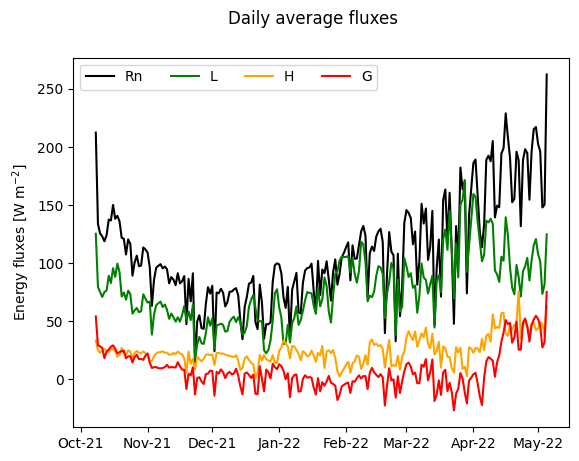

In [725]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots()
ax.plot(df_daily["Net_Radiation"], color="black")
ax.plot(df_daily["Latent_Heat"], color="green")
ax.plot(df_daily["Sensible_Heat"], color="orange")
ax.plot(df_daily["SHF"], color="red")

ax.legend(["Rn","L","H","G"],ncol=4)
plt.ylabel('Energy fluxes [W m$^{-2}$]')

date_form=mdates.DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)

fig.suptitle("Daily average fluxes")

<H3>4.3 Overview of Soil Moisture</H3>

Text(0.5, 0.98, 'Soil moisture dynamics')

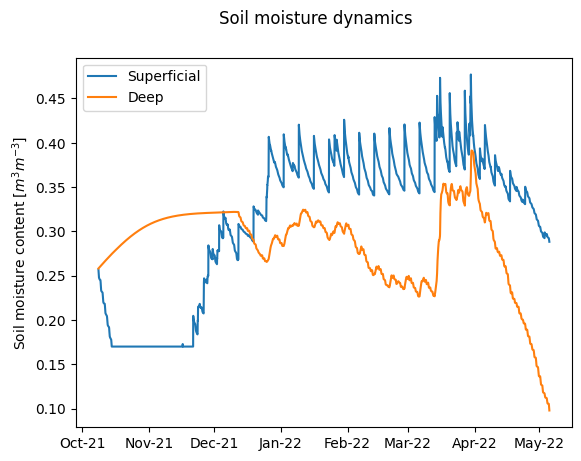

In [726]:
fig, ax = plt.subplots()
ax.plot(df["Date"],df["SM"])
ax.plot(df["Date"],df["SM2"])

ax.legend(["Superficial","Deep"])
plt.ylabel('Soil moisture content [$m^3 m^{-3}$]')

date_form=mdates.DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)

fig.suptitle("Soil moisture dynamics")

<H3>4.4 Surface temperature time series over a selected point</H3>

(15.0, 60.0)

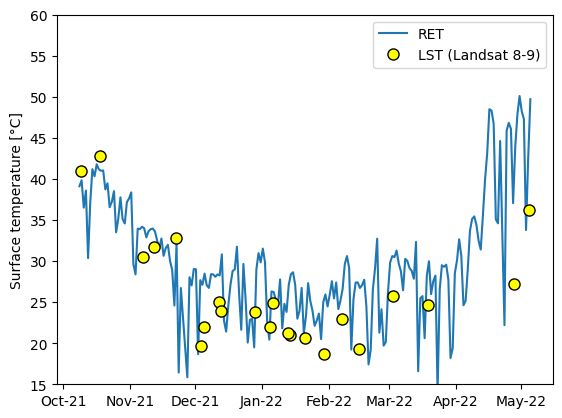

In [730]:
# Extract RET retrievals at 11 a.m.
mask = (df.Date.dt.hour == 11)
df_ret = df.loc[mask]

# Temperatures (model retrievals only at 11 a.m.)
fig, ax = plt.subplots()
ax.plot(df_ret["Date"],df_ret["RET"])
ax.plot(arr_time,lst_data, linestyle = 'none',
        marker = 'o', ms = 8, mfc = 'yellow', mec = 'black')

ax.legend(["RET","LST (Landsat 8-9)"])
plt.ylabel('Surface temperature [°C]')

date_form=mdates.DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)
ax.set_ylim([15, 60])

<H3>4.5 Surface temperature map overview</H3>

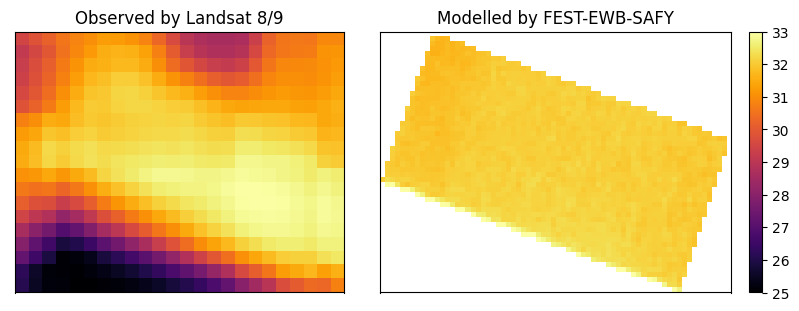

In [731]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from PIL import Image
imlst = Image.open('./LST/Sidi_Bennour_LST_2021-11-22.tif')
imret = pd.read_csv("RET_2021-11-22.txt",sep=" ",header=None)
imret = np.array(imret)
imret[imret==imret[1,1]]=None

fig, axt = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

ptm = axt[0].imshow(np.asarray(imlst), cmap='inferno')
#fig.colorbar(ptm, ax=axt[0])
axt[0].set_title('Observed by Landsat 8/9')
axt[0].set_xticks([])
axt[0].set_yticks([])

ptm = axt[1].imshow(np.asarray(imret), cmap='inferno',vmin=25,vmax=33)
fig.colorbar(ptm, ax=axt[1])
axt[1].set_title('Modelled by FEST-EWB-SAFY')
axt[1].set_xticks([])
axt[1].set_yticks([])

plt.show()

<H3>4.6 Leaf area index overview over a single point</H3>

Text(0.5, 0.98, 'Vegetation density')

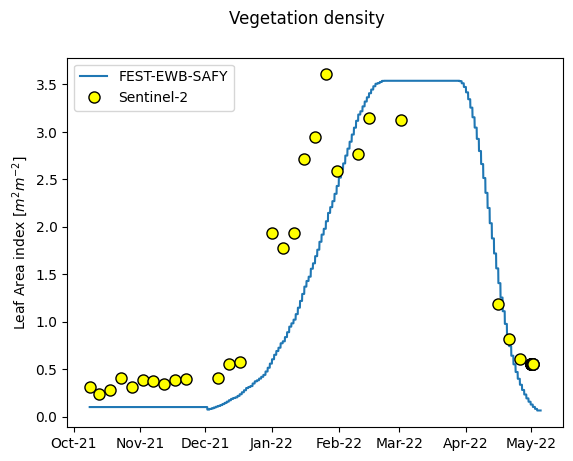

In [732]:
df_lai = pd.read_csv('veg_data.csv',delimiter=',',
                parse_dates=["Date"])

fig, ax = plt.subplots()
ax.plot(df["Date"],df["LAI"])
ax.plot(df_lai["Date"],df_lai["lai"], linestyle = 'none',
        marker = 'o', ms = 8, mfc = 'yellow', mec = 'black')

ax.legend(["FEST-EWB-SAFY","Sentinel-2"], loc=2)
plt.ylabel('Leaf Area index [$m^2 m^{-2}$]')

date_form=mdates.DateFormatter("%b-%y")
ax.xaxis.set_major_formatter(date_form)

fig.suptitle("Vegetation density")

<H3>4.7 Leaf area index map overview</H3>

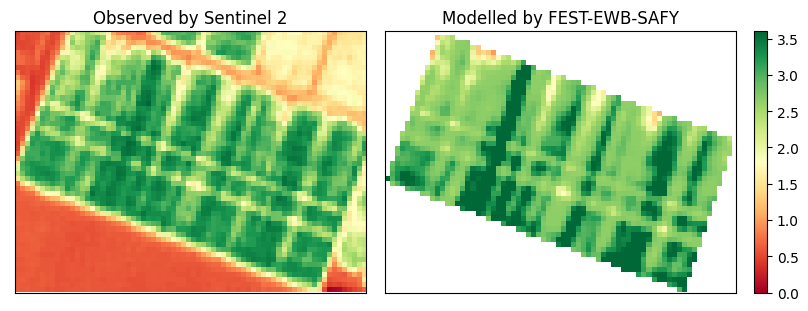

In [733]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.colors import ListedColormap, LinearSegmentedColormap
from PIL import Image
imlai = Image.open('./LAI/Sidi_Bennour_LAI_2022-02-15.tif')
laifest = pd.read_csv("LAI_2022-02-15.txt",sep=" ",header=None)
laifest = np.array(laifest)
laifest[laifest==laifest[1,1]]=None

fig, axs = plt.subplots(1, 2, figsize=(8, 3), constrained_layout=True)

psm = axs[0].imshow(np.asarray(imlai), cmap='RdYlGn')
#fig.colorbar(psm, ax=axs[0])
axs[0].set_title('Observed by Sentinel 2')
axs[0].set_xticks([])
axs[0].set_yticks([])

psm = axs[1].imshow(np.asarray(laifest), cmap='RdYlGn',vmin=0,vmax=3.6)
fig.colorbar(psm, ax=axs[1])
axs[1].set_title('Modelled by FEST-EWB-SAFY')
axs[1].set_xticks([])
axs[1].set_yticks([])

plt.show()

<H3>4.8 Seasonal Evapotranspiration map</H3>

[]

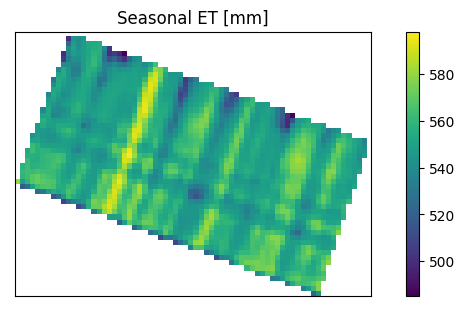

In [734]:
import numpy as np

et = pd.read_csv("ET.txt",sep=" ",header=None)
et = np.array(et)
et[et==et[1,1]]=None

fig, axset = plt.subplots(1, 1, figsize=(8, 3), constrained_layout=True)

pet = axset.imshow(et, cmap='viridis')
fig.colorbar(pet, ax=axset)
axset.set_title('Seasonal ET [mm]')
axset.set_xticks([])
axset.set_yticks([])